# 1、一维边缘增强实现

In [1]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
np.set_printoptions(suppress=True, threshold=np.nan)

### 定义sigmoid函数，产生要操作的信号

In [2]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

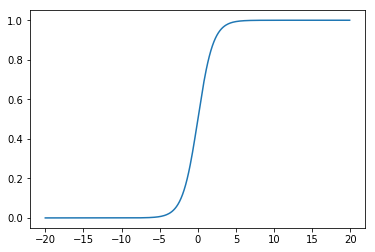

In [3]:
x = np.arange(-20,20,0.1)      
y = sigmoid(x)

plt.plot(x,y)  


### 对信号进行一阶差分，代替求导

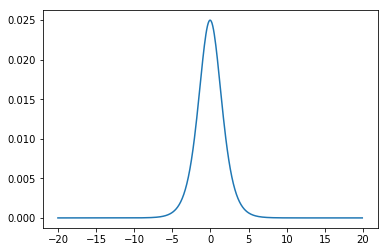

In [4]:

z = np.arange(-20,20,0.1) 
for i in range(400-1):
    z[i] = y[i + 1] - y[i]

z[399] = 0
plt.plot(x,z)  #  只提供x轴，y轴参数，画最简单图形

### 对信号再进行一阶差分（相当于二阶差分）

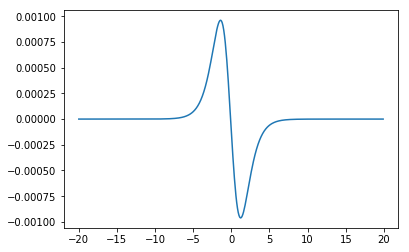

In [5]:
w = np.arange(-20,20,0.1) 
for i in range(400-1):
    w[i] = z[i + 1] - z[i]
w[399] = 0
plt.plot(x,w)  #  只提供x轴，y轴参数，画最简单图形

### 将二阶差分后的信号进行反向并加权值，随后将其叠加到原信号上实现信号增强

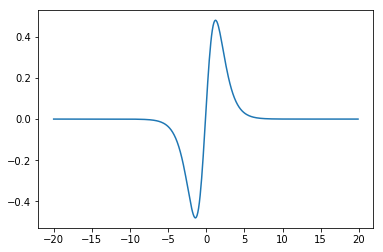

In [6]:
lambd = 500
z =- w * lambd
plt.plot(x,z)  #  只提供x轴，y轴参数，画最简单图形


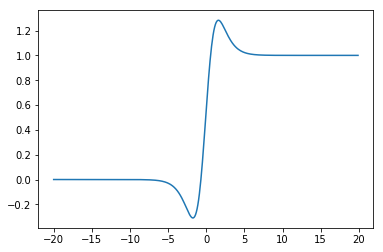

In [7]:
dst = y + z
plt.plot(x,dst)  #  只提供x轴，y轴参数，画最简单图形

# 一维信号平滑实验

### 产生阶跃信号

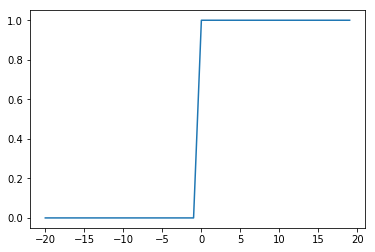

In [8]:
src = np.zeros(40)
index = np.arange(-20,20,1) 
for i in range(20,40):
    src[i] = 1
#print(src)
plt.plot(index,src)  #  

### 定义高斯函数，作为窗函数

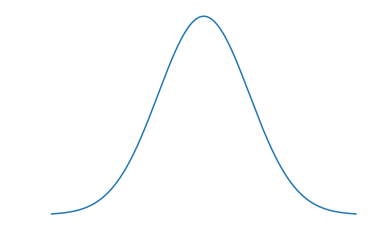

In [9]:
def guass(x,sigma =10/3):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-x*x/(2*sigma*sigma))
index = np.arange(-20,20,0.01) 
dst2 = guass(index,6)
plt.axis("off")#去除坐标轴
plt.plot(index,dst2)


### 利用卷积实现平滑

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03885528 0.0971111
 0.17693667 0.27690405 0.3913204  0.51100308 0.62541942 0.72538681
 0.80521238 0.8634682  0.8634682  0.8634682  0.8634682  0.8634682
 0.8634682  0.8634682  0.8634682  0.8634682  0.8634682  0.8634682 ]


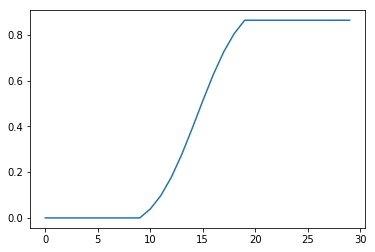

In [10]:
index = np.arange(-5,5,1) 
dst2 = guass(index) 
z = np.zeros(40)
a = 0
for i in range(40):
    for j in range(10):
        a = a + src[i - j] * dst2[j]
    z[i] = a
    a = 0
z = z[10:]
plt.plot(z) 
print(z)

### 调用numpy卷积函数进行对比，数据一致

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03885528
 0.0971111  0.17693667 0.27690405 0.3913204  0.51100308 0.62541942
 0.72538681 0.80521238 0.8634682  0.8634682  0.8634682  0.8634682
 0.8634682  0.8634682  0.8634682  0.8634682  0.8634682  0.8634682
 0.8634682 ]


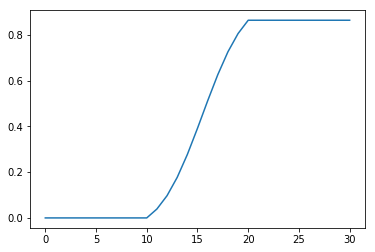

In [11]:
dst3 = np.convolve(src, dst2, 'valid')
plt.plot(dst3)
print(dst3)